# TMDB Movie data analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li>
    <a href="#eda">Exploratory Data Analysis</a>
    <ul>
        <li>Which genres are most popular from year to year?</li>
        <li>How does genre correlate to runtime?</li>
        <li>Which genres has the highest revenue?</li>
        <li>How does budget correspond to Revenue?</li>
        <li>How does runtime correlate to revenue?</li>
        <li>Have Budgets changed over time?</li>
        <li>Has revenue changed overtime</li>
        <li>Which year had the highest average revenue?</li>
        <li>Which year had the highest average budget?</li>
        <li>How does budget relate to popularity?</li>
    </ul>
</li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We will be looking at a database of of ~10,000 movies released between 1960 and 2015. We will be using this data set to attempt to answer the questions: Which genres are most popular from year to year? and What kinds of properties are associated with movies that have high revenues?

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('./data/tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Firstly lets take a look at the data we are working with. It appears we have 10866 rows of data, with 21 columns.

In [223]:
data.shape

(10866, 21)

The dataset has 10866 rows, and 21 columns.

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are columns representing: `id`, `imdb_id`, `popularity`, `budget`, `revenue`, `original_title`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `genres`, `production_companies`, `release_date`, `vote_count`, `vote_average`, `release_year`, `budget_adj`, `revenue_adj`.

Since we are looking at popularity, budget, revenue, cast, directors, and genres we will keep those columns, but budget and revenue are not easily comparable due to inflation we will be using the `budget_adj` and `revenue_adj`, and the `vote_count`, `vote_average`, are not comparable since not all row have a consistent number of votes.

In [225]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


At least 50% of the Adjuster Budget and Revenue appear to have a 0 value, we will drop those as outliers.

In [226]:
data.duplicated().sum()

1

There is one duplicate to clean up. 

### Data Cleaning
 We will remove `imdb_id`, `budget`, `revenue`, `homepage`, `tagline`, `keywords`, `overview`, `production_companies`, `release_date`, `vote_count`, `vote_average`. Of the columns we are keeping we will be performing the following actions to clean and normalize the data:
 - Drop Columns we wont be using
 - Drop rows with null values
 - Drop duplicated rows
 - For `budget_adj` and `revenue_adj` we will be converting the floats to integers
 - FIlter out rows where `revenue_adj` is 0 

In [227]:
columns_to_drop = ['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count', 'vote_average']
data.drop(columns_to_drop, inplace=True, axis=1)

Drop columns we will not be using.

In [228]:
data.dropna(inplace=True)

Drop rows with null values.

In [229]:
data.drop_duplicates(inplace=True)

Drop duplicate rows.

In [230]:
columns_to_update = {
    'budget_adj': int,
    'revenue_adj': int
}
data = data.astype(columns_to_update)

Convert the Adjusted Budget and Revenue columns from floats into integers.

In [231]:
data.query('revenue_adj > 0', inplace=True)

Filter out rows with 0 adjusted revenue.

In [232]:
data.shape

(4843, 10)

After all of our cleanup we have 4843 rows, and 10 columns

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4843 non-null   int64  
 1   popularity      4843 non-null   float64
 2   original_title  4843 non-null   object 
 3   cast            4843 non-null   object 
 4   director        4843 non-null   object 
 5   runtime         4843 non-null   int64  
 6   genres          4843 non-null   object 
 7   release_year    4843 non-null   int64  
 8   budget_adj      4843 non-null   int64  
 9   revenue_adj     4843 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 416.2+ KB


We have converted `budget_adj` and `revenue_adj` to be integers

In [234]:
data.describe()

,id,popularity,runtime,release_year,budget_adj,revenue_adj
count,4843.000000,4843.000000,4843.000000,4843.000000,4.843000e+03,4.843000e+03
mean,44552.099112,1.046315,107.969647,2000.914516,3.520258e+07,1.152341e+08
std,72378.612654,1.357222,21.107426,11.571917,4.377308e+07,1.989424e+08
min,5.000000,0.001117,15.000000,1960.000000,0.000000e+00,2.000000e+00
25%,8276.000000,0.388227,95.000000,1994.000000,2.334746e+06,1.048057e+07
50%,12150.000000,0.680803,104.000000,2004.000000,2.032801e+07,4.402879e+07
75%,43954.000000,1.210533,117.000000,2010.000000,4.973958e+07,1.317599e+08
max,417859.000000,32.985763,705.000000,2015.000000,4.250000e+08,2.827124e+09


This cleanup has significantly reduced the size of the dataset, by about 50%, and removed many of the outliers. 

<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

In [235]:
# make a copy of the data set that we can use to look analyze the data by genre
data_genre_split = data.copy()

#split the genre string into an array
data_genre_split['genres'] = data_genre_split.genres.str.split('|')


In [236]:
#break up each movie into a row based on genre
data_genre_explode = data_genre_split.explode('genres')

In [237]:
# get only columns i need
data_genre = data_genre_explode[['popularity', 'genres','release_year']]

In [238]:
#group genres by year
data_genre_grouped = data_genre.groupby(['release_year','genres']).popularity.mean()

In [239]:
#get most popular each year
data_genre_grouped_each_year = data_genre_grouped.to_frame().groupby('release_year').popularity.nlargest(1).to_frame()
data_genre_grouped_each_year.reset_index(level=2,inplace=True)
data_genre_grouped_each_year.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56 entries, (1960, 1960) to (2015, 2015)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      56 non-null     object 
 1   popularity  56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


We have successfully split the genres, and determined the most popular genre for each year.

In [240]:
# get genre counts
genre_counts = data_genre_grouped_each_year.genres.value_counts()
genre_counts

Animation          11
Fantasy            10
Science Fiction     7
Adventure           6
Horror              3
Family              3
Crime               3
War                 3
Thriller            2
Action              2
Drama               2
Western             2
Mystery             1
Music               1
Name: genres, dtype: int64

It looks like Animation occurs the most often. 

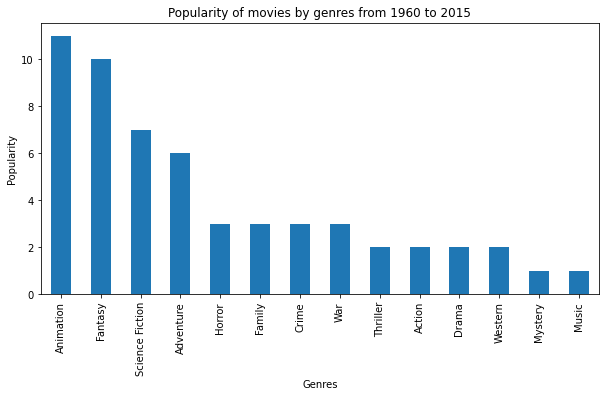

In [241]:
# create plot
plt.figure(figsize=(10,5))
genre_counts.plot.bar(title="Popularity of movies by genres from 1960 to 2015",xlabel="Genres",ylabel="Popularity");

Animation is appears to be the most popular genre, followed closely by fantasy, then Science Fiction. 

## How does genre correlate to runtime?

In [242]:
# use the data frame with the genres split, group by genre and sort by average runtime
data_genre_runtime = data_genre_explode.groupby('genres').runtime.mean().sort_values(ascending=False)
data_genre_runtime

genres
History            138.235294
War                134.255474
Western            122.784615
Drama              114.271686
Foreign            112.433333
Adventure          111.485172
Action             110.883333
Mystery            110.668293
Crime              110.434670
Romance            109.160959
Music              108.641304
Thriller           108.533052
Science Fiction    107.066553
Fantasy            106.368764
Comedy             101.172316
Horror              98.871658
Documentary         98.309278
Family              97.947368
TV Movie            89.000000
Animation           88.286920
Name: runtime, dtype: float64

History appears to have the longest average runtime of ~138 minutes followed closely by war at ~134 minutes

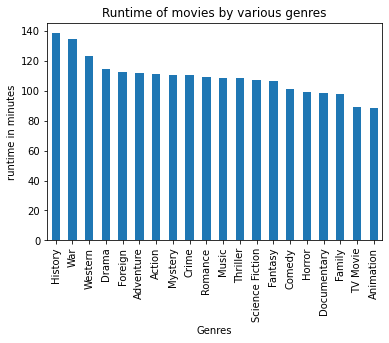

In [243]:
data_genre_runtime.plot.bar(title = 'Runtime of movies by various genres',xlabel='Genres',ylabel='runtime in minutes');

While History and War have the longest average runtime, the gap is not not that wide with the shortest average runtime being animation in the high 80's. 

## Which genres has the highest revenue?

In [244]:
# use the data frame with the genres split, group by genre and sort by average runtime
data_genre_revenue = data_genre_explode.groupby('genres').revenue_adj.mean().astype(int).sort_values(ascending=False)
data_genre_revenue

genres
Animation          251451614
Adventure          247217390
Fantasy            221020568
Family             210533898
Science Fiction    182417194
Action             173612475
War                137928834
Western            117026286
Thriller           113021569
History            104672071
Music              103448438
Comedy             102634002
Mystery            100537389
Crime               99205302
Romance             94186800
Drama               84708645
Horror              70273434
TV Movie            58389103
Documentary         11753134
Foreign             10810169
Name: revenue_adj, dtype: int64

Animation appears to have the the highest revenue followed very closely by adventure.

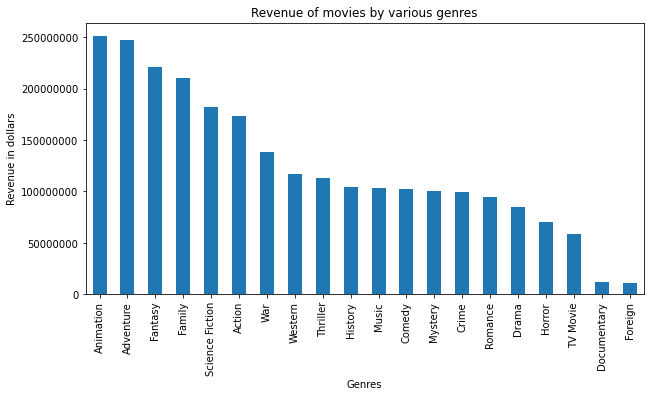

In [245]:
#plot revenue by genre
plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain', useOffset=False)
data_genre_revenue.plot.bar(title = 'Revenue of movies by various genres',xlabel='Genres',ylabel='Revenue in dollars');

Animation appears to have the highest revenue, with a large variance to the lowest two genres Documentary, and Foreign. 

## How does budget correspond to Revenue?

In [246]:
# remove outliers  
data_rev_bug = data.query('budget_adj < 250000000 and revenue_adj < 2000000000')
data_rev_bug.shape

(4829, 10)

With outliers removed we can get a better visualization.

<AxesSubplot:xlabel='budget_adj', ylabel='revenue_adj'>

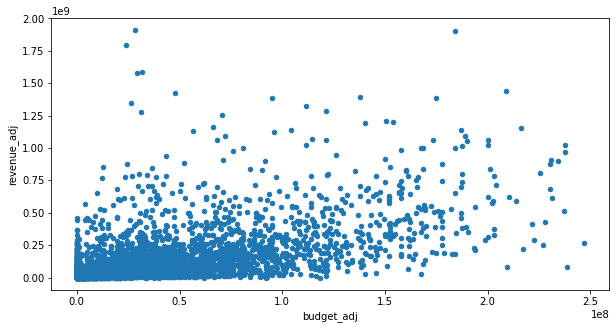

In [247]:
data_rev_bug.plot.scatter('budget_adj', 'revenue_adj', figsize=(10,5))

It looks like there is a loose correlation between increased budger and revenue

## How does runtime correlate to revenue?

In [248]:
# remove outliers
data_rev_run = data.query(' 60 < runtime < 300 and revenue_adj < 2000000000')

<AxesSubplot:xlabel='runtime', ylabel='revenue_adj'>

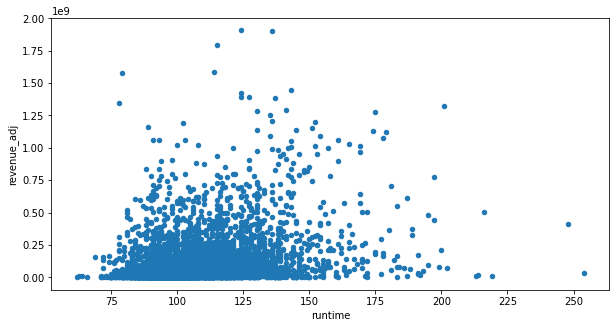

In [249]:
data_rev_run.plot.scatter('runtime', 'revenue_adj', figsize=(10,5))

There does not appear to be a strong correlation between runtime and revenue.

## Have revenue and budget changed over time?

<AxesSubplot:xlabel='release_year'>

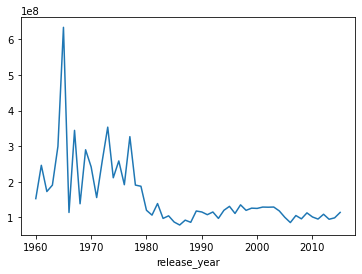

In [250]:
data.groupby(['release_year']).revenue_adj.mean().plot()

Revenue has a large spike in the late 60's, but has a downward trajectory.

## Has budget changed overtime

<AxesSubplot:xlabel='release_year'>

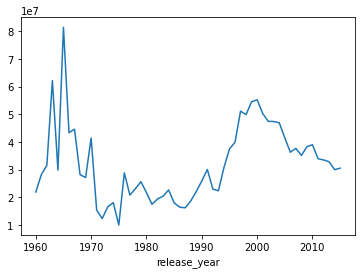

In [251]:
data.groupby(['release_year']).budget_adj.mean().plot()

Budgets saw a sharp increase in the 60's with a valley between the 70's and 90's, overall budgets have an upward trajectory.

## Wich year had the highest average revenue?

In [252]:
data_year_rev = data.groupby(['release_year']).revenue_adj.mean()
data_year_rev.idxmax()

1965

## Which year had the highest average budget?

In [253]:
data_year_bug = data.groupby(['release_year']).budget_adj.mean()
data_year_bug.idxmax()

1965

## How does budget relate to popularity

<AxesSubplot:xlabel='budget_adj', ylabel='popularity'>

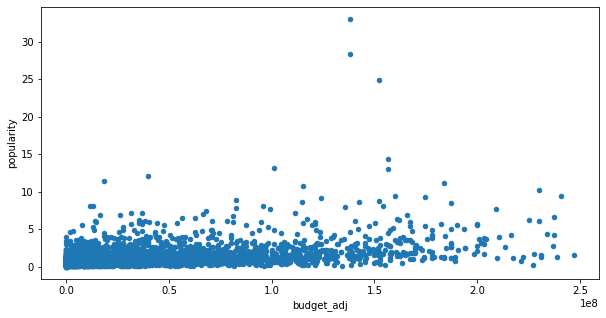

In [254]:
data_pop_bug = data.query('budget_adj < 250000000')
data_pop_bug.plot.scatter('budget_adj', 'popularity', figsize=(10,5))

Budgets do not appear to have a strong correlation to popularity.

<a id='conclusions'></a>

## Conclusions

Based on our analysis of this dataset we asked 10 questions and learned the following. 
- Which genres are most popular from year to year? 
    - between 1960 and 2015 Animation was the most popular followed by Fantasy.
- How does genre correlate to runtime?
    - History has the highest runtime followed by War and Western.
- Which genres has the highest revenue?
    - Animation has the highest revenue, followed by adventure, and fantasy.
- How does budget correspond to Revenue?
    - Higher budgets appear to correlate to higher revenue.
- How does runtime correlate to revenue?
    - Run time does not seem to correlate to higher revenue in a meaningful way. 
- Has revenue changed overtime
    - These findings were a bit surprising. The 1960's saw a dramatic increase in revenue which dropped sharply in the 1970's and 1980's and has seen a slightly decreasing trajectory since.
- Have Budgets changed over time?
    - Budgets have an increasing trajectory.
- Which year had the highest average revenue?
    - 1965 saw the highest average revenue.
- Which year had the highest average budget?
    - 1965 saw the highest average budget
- How does budget relate to popularity?
    - Budgets do not seem to correlate to popularity in a meaningful way. 

## Limitations


- We cannot conclude that one attribute affects another, only that they appear to be correlated. **Correlation does not imply causation**.
- Since we dropped all 0 revenue films we only performed analysis on roughly 50% of the dataset.
- Most films have more than 1 genre and we treated each genre associated with a film as as separate film.